<a href="https://colab.research.google.com/github/ColeWarner0898/Super-Bowl-Ads/blob/main/SuperBowlAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import csv
filename = "superbowlads.csv"
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [9]:
from google.colab import drive
temp = pd.read_csv('gdrive/My Drive/superbowl-ads.csv', delimiter='^',quotechar='"')
temp.iloc[561]='2020,'+temp.iloc[561]
new = temp.iloc[:,0].str.split(',', n = 3, expand = True) 
new[3]=new[3].str.replace('"','')
new[1]=new[1].str.replace('"','')
new[2]=new[2].str.strip('"')
new2=new[2].str.split('""', n = 1, expand = True) 
new = pd.concat([new.iloc[:,[0,1]],new2,new.iloc[:,3]],axis=1).values

df=pd.DataFrame(new,columns=["Year","Type","Product","Title","Notes"])
df=df.loc[df['Type']!='Product type']
del temp , new , new2
df.head()

,Year,Type,Product,Title,Notes
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."


 **Now we want to group similar data together.**

In [15]:
dictOfTypes = {'Car': 'Car',
 'Security': 'Security',
 'Copy': 'Copy',
 'Soft drink': 'Beverage',
 'Camera': 'Technology',
 'Computer': 'Technology',
 'Restaurant': 'Food',
 'Beer': 'Beverage',
 'Food': 'Food',
 'Credit card': 'Bank Insurance',
 'Soft Drink': 'Beverage',
 'Footwear': 'Clothing',
 'Clothing': 'Clothing',
 'Film': 'Film',
 'Mail': 'Technology',
 'Shoes': 'Clothing',
 'Sports': 'Sports',
 'Tire': 'Car',
 'Website': 'Technology',
 'Candy': 'Food',
 'TV': 'TV',
 'Gaming': 'Video games',
 'Potato chips': 'Food',
 'PSA': 'PSA',
 'Technology': 'Technology',
 'Manufacturing': 'Car',
 'Mobile phone': 'Phone',
 'TV show': 'TV',
 'Video Game': 'Video games',
 'Store': 'Store',
 'Truck': 'Truck',
 'Product type': 'Product type',
 'Car accessories': 'Car',
 'Adhesives': 'Adhesives',
 'Antifungal medication': 'Care',
 'Feminine care products': 'Care',
 'Insurance': 'Bank Insurance',
 'Lingerie': 'Clothing',
 'Phone': 'Phone',
 'Phone accessory': 'Phone',
 'Service': 'Service',
 'Skincare products': 'Care',
 'Software': 'Technology',
 'Game': 'Video games',
 'Toothpaste': 'Care',
 'Building materials': 'Building materials',
 'Cleaner': 'Cleaner',
 'Tax preparation': 'Bank Insurance',
 'TV series': 'TV',
 'Video games': 'Video games',
 'Web hosting': 'Technology',
 'Wireless': 'Technology',
 'Airlines': 'Travel',
 'Car / Film': 'Car',
 'Drink': 'Beverage',
 'Food / Drink': 'Food',
 'Headphones': 'Phone',
 'Investments': 'Bank Insurance',
 'Laundry detergent': 'Cleaner',
 'Loans': 'Bank Insurance',
 'Retail': 'Retail',
 'TV special': 'TV',
 'Travel': 'Travel',
 'Video game': 'Video games',
 'Alcohol': 'Beverage',
 'Alcohol / TV series': 'Beverage',
 'Beverage': 'Beverage',
 'Smart speaker': 'Phone',
 'NFL': 'NFL',
 'Video gaming': 'Video games'}

 

In [16]:
df['Type'] = df['Type'].map(dictOfTypes)
df.head(10)

,Year,Type,Product,Title,Notes
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Beverage,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
5,1981,Technology,Polaroid,Now with a Flash,A couple walks in a park. The man shows that n...
6,1982,Technology,RadioShack,Color Computer,A commercial for the TRS-80 computer.
7,1982,Food,McDonald's,Hopscotch,Two kids are playing hopscotch while singing t...
8,1984,Technology,Apple Inc.,1984,In what some call the greatest Super Bowl comm...
9,1984,Technology,Atari,Get Started,None


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 562
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     558 non-null    object
 1   Type     558 non-null    object
 2   Product  558 non-null    object
 3   Title    371 non-null    object
 4   Notes    548 non-null    object
dtypes: object(5)
memory usage: 26.2+ KB


In [18]:
df_counts = pd.crosstab(df['Type'],df['Year'])
df_counts.head()

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,1990,1992,1993,1994,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adhesives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Bank Insurance,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,5,0,1,5,0,0
Beverage,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,5,4,5,5,3,0,3,4,0,4,8,7,2,4,0,2,3,2,3,9,10,1
Building materials,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Car,1,1,0,0,0,0,0,0,0,0,1,0,2,2,0,1,2,0,0,0,0,0,1,1,0,1,3,6,7,4,1,4,12,5,7,12,6,8


**The number of Super Bowl ads over time**

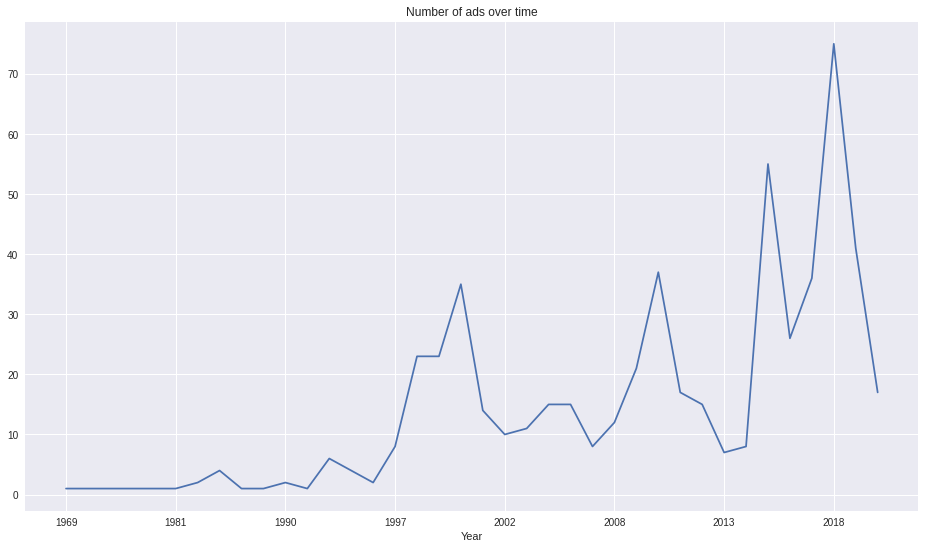

In [19]:
ads_by_time = df_counts.sum(axis=0)
ads_by_time.plot(figsize=(16,9),title="Number of ads over time")
plt.show()

**The advertisements that appeared more than ten times from 1969 to 2020**

In [20]:
df_counts['Total'] = df_counts.sum(axis=1)
df_counts.sort_values(by='Total', ascending=False,inplace=True)
top = df_counts.loc[df_counts['Total']>10].drop('Total', 1)
filter = list(top.index)
print(50*"#"+"\n# Most frequent type (descending order)\n"+50*"#")
print(filter)
top.head(10)

##################################################
# Most frequent type (descending order)
##################################################
['Film', 'Beverage', 'Car', 'Technology', 'Food', 'TV', 'Bank Insurance']


Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,1990,1992,1993,1994,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,10,3,6,4,10,7,8,8,5,6,7,5,5,4,0,10,9,6,6,8,3
Beverage,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,5,4,5,5,3,0,3,4,0,4,8,7,2,4,0,2,3,2,3,9,10,1
Car,1,1,0,0,0,0,0,0,0,0,1,0,2,2,0,1,2,0,0,0,0,0,1,1,0,1,3,6,7,4,1,4,12,5,7,12,6,8
Technology,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,3,5,24,1,1,1,0,1,0,2,1,6,0,0,0,0,5,0,9,8,4,1
Food,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,3,4,2,1,1,1,0,1,0,0,0,3,6,2,1,1,1,6,4,1,7,5,4
TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,6,10,4,0
Bank Insurance,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,5,0,1,5,0,0


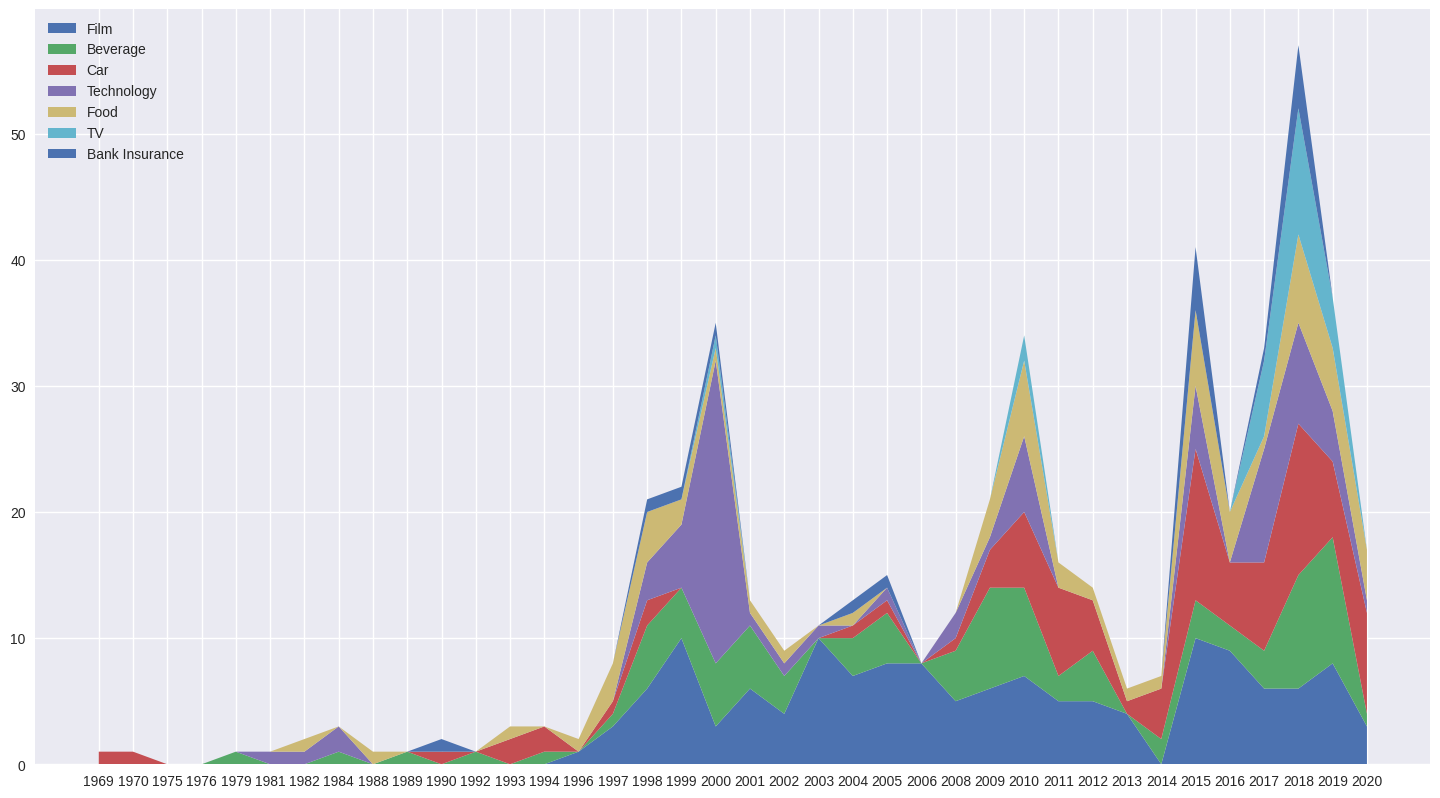

In [22]:
labels = filter
fig, ax = plt.subplots(figsize=(18,10), dpi= 100) 
ax.stackplot(top.columns, top.values, labels=labels)
ax.legend(loc='upper left')
plt.show()

**The top advertisements by year**

In [23]:
col = df_counts.columns
result=[]
for i in range(0,col.shape[0]):
    list_temp = list(df_counts.loc[df_counts[col[i]]>0,col[i]].sort_values(ascending=False)[:10].index)
    for j in range(len(list_temp),10):
        list_temp.append('-')
    result.append(list_temp)
result = np.vstack(result).transpose()
result = pd.DataFrame(data=result,columns=col)

In [24]:
result.iloc[:,:18].head(10)

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,1990,1992,1993,1994,1996,1997,1998,1999
0,Car,Car,Security,Copy,Beverage,Technology,Food,Technology,Food,Beverage,Bank Insurance,Beverage,Clothing,Car,Food,Food,Film,Film
1,-,-,-,-,-,-,Technology,Security,-,-,Car,-,Car,Clothing,Film,Film,Beverage,Technology
2,-,-,-,-,-,-,-,Beverage,-,-,-,-,Food,Beverage,-,Car,Food,Beverage
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Beverage,Technology,Food
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Car,Sports
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Sports,Bank Insurance
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Clothing,-
7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Bank Insurance,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [25]:
result.iloc[:,18:].head(10)

Year,2000,2001,2002,2003,2004,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Technology,Film,Film,Film,Film,Film,Film,Film,Beverage,Beverage,Car,Film,Film,Car,Car,Film,Technology,Car,Beverage,Car,Film
1,Beverage,Beverage,Beverage,Technology,Beverage,Beverage,-,Beverage,Film,Film,Film,Car,Truck,Beverage,Film,Car,Car,TV,Film,Food,Beverage
2,Film,Video games,Video games,-,PSA,Bank Insurance,-,Technology,Food,Food,Food,Beverage,Food,Store,Food,Food,TV,Beverage,Car,Film,Car
3,Bank Insurance,Food,Food,-,Video games,Technology,-,Car,Car,Technology,Beverage,Store,Car,Food,Bank Insurance,Phone,Film,Technology,Food,Technology,Technology
4,TV,Technology,Technology,-,Bank Insurance,Car,-,-,Technology,Car,Store,Food,-,-,Technology,Beverage,Beverage,Food,TV,Beverage,Food
5,Food,-,-,-,Food,-,-,-,-,TV,-,-,-,-,Phone,Care,Building materials,Cleaner,Technology,-,TV
6,-,-,-,-,Car,-,-,-,-,Phone,-,-,-,-,Care,Sports,Cleaner,Film,NFL,-,Bank Insurance
7,-,-,-,-,-,-,-,-,-,Clothing,-,-,-,-,Beverage,Clothing,Video games,Sports,Store,-,Video games
8,-,-,-,-,-,-,-,-,-,Video games,-,-,-,-,Service,Video games,Bank Insurance,Bank Insurance,Phone,-,Clothing
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Clothing,-,Food,Travel,Video games,-,Phone
